In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("main_ucl.xlsx")

#### Feature engineering

In [3]:
df.sample(5)

,Season,Home_team,FT_score,Away_team,Winning_team,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
41,82/83,Hamburger SV,1:0,Juventus FC,Hamburger SV,West Germany,Italy,Greece,Olympic Stadium,Michel Platini,Juventus FC,France,5,Attacking Midfield
55,68/69,AC Milan,4:1,Ajax Amsterdam,AC Milan,Italy,Netherlands,Spain,Santiago Bernabéu,Denis Law,Manchester United,Scotland,9,Centre-Forward
61,62/63,AC Milan,2:1,SL Benfica,AC Milan,Italy,Portugal,England,Wembley Stadium,José Altafini,AC Milan,Italy,14,Centre-Forward
46,77/78,Liverpool FC,1:0,Club Brugge KV,Liverpool FC,England,Belgium,England,Wembley Stadium,Allan Simonsen,Borussia Mönchengladbach,Denmark,5,Second Striker
37,86/87,FC Porto,2:1,Bayern Munich,FC Porto,Portugal,West Germany,Austria,Praterstadion,Borislav Cvetkovic,Red Star Belgrade,Serbia,7,Left Winger


In [4]:
df.replace('West Germany', 'Germany', inplace=True)

Replacing all of occurences "West Germany" as "Germany" to make our analysis more accurate.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Season               69 non-null     object
 1   Home_team            69 non-null     object
 2   FT_score             69 non-null     object
 3   Away_team            69 non-null     object
 4   Winning_team         69 non-null     object
 5   Winners_country      69 non-null     object
 6   Runner_ups_country   69 non-null     object
 7   Host_Country         69 non-null     object
 8   Finals_stadium       69 non-null     object
 9   Top_scorer           69 non-null     object
 10  Top_scorer_club      69 non-null     object
 11  Top_scorer_country   69 non-null     object
 12  Top_scorer_goals     69 non-null     int64 
 13  Top_scorer_position  69 non-null     object
dtypes: int64(1), object(13)
memory usage: 7.7+ KB


In [6]:
df["GD"]=df['FT_score'].apply(
    lambda x: abs(
        int(x.split(' ')[0].split(':')[0]) - int(x.split(' ')[0].split(':')[1])
    )
)
#calculating goal difference

In [7]:
df["Losing_team"] = df.apply(
    lambda row: row["Home_team"] if int(row["FT_score"].split(":")[0]) < int(row["FT_score"].split(":")[1][0]) 
    else row["Away_team"], axis=1
)

In [8]:
df=df[["Season",  "Home_team",	"FT_score",	"Away_team","Winning_team", "Losing_team" ,"GD","Winners_country","Runner_ups_country",	"Host_Country",	"Finals_stadium",	"Top_scorer",	"Top_scorer_club",	"Top_scorer_country",	"Top_scorer_goals",	"Top_scorer_position"]]

In [9]:
df.loc[df.isna().any(axis=1)]

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position


#### Club level analysis:
- Most UCL titles
- Most Runner's up
- Most appearences in Finals
- Best Win % in Finals

Finding the top 5 clubs with most ucls

In [10]:
df["Winning_team"].value_counts().head()

Real Madrid      15
AC Milan          7
Bayern Munich     6
Liverpool FC      6
FC Barcelona      5
Name: Winning_team, dtype: int64

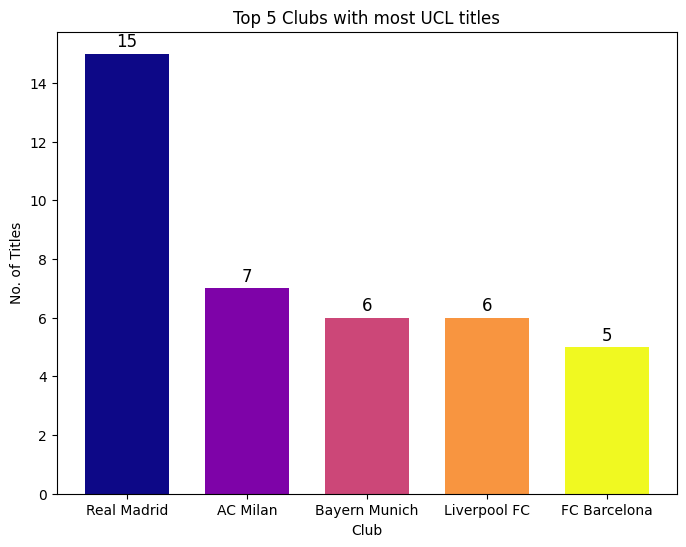

In [11]:
fig = plt.figure(figsize = (8, 6))
colors = plt.cm.plasma(np.linspace(0, 1, 5))  # Choosing the 'viridis' colormap for 5 bars

# creating the bar plot
plt.bar(df["Winning_team"].value_counts().index[:5],df["Winning_team"].value_counts().head(),width=0.7,color=colors)

plt.xlabel("Club")
plt.ylabel("No. of Titles")
plt.title("Top 5 Clubs with most UCL titles")

for i, value in enumerate(df["Winning_team"].value_counts().head()):
    plt.text(i, value + 0.1,  # Coordinates: i = x-axis position, value + offset = y-axis position
             str(value),      # Text to display (converting the value to string)
             ha='center',     # Horizontal alignment of text
             va='bottom',     # Vertical alignment
             fontsize=12)     # Font size of the text

plt.show()



Finding the top 5 clubs with most runner's up

In [12]:
df["Losing_team"].value_counts().head()

Juventus FC      7
SL Benfica       5
Bayern Munich    5
AC Milan         4
Liverpool FC     4
Name: Losing_team, dtype: int64

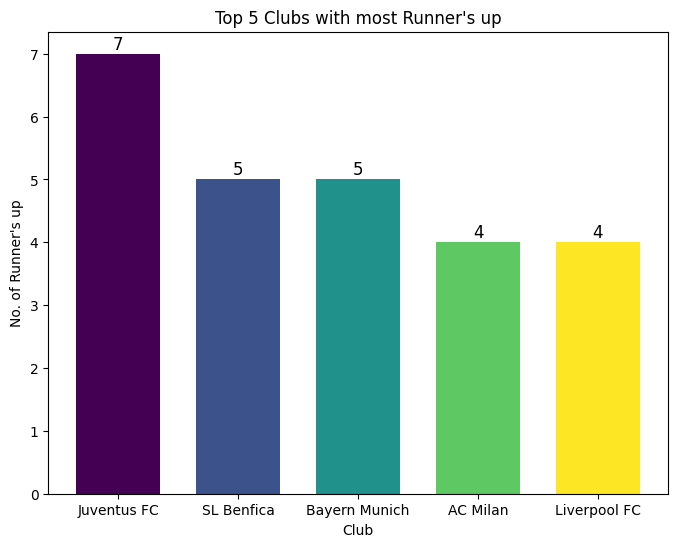

In [13]:
fig = plt.figure(figsize = (8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Choosing the 'viridis' colormap for 5 bars

# creating the bar plot
plt.bar(df["Losing_team"].value_counts().index[:5],df["Losing_team"].value_counts().head(),width=0.7,color=colors)

plt.xlabel("Club")
plt.ylabel("No. of Runner's up")
plt.title("Top 5 Clubs with most Runner's up")
for i, value in enumerate(df["Losing_team"].value_counts().head()):
    plt.text(i, value + 0.01,  
             str(value),      
             ha='center',    
             va='bottom',     
             fontsize=12)     

plt.show()


Team with most appearences in UCL finals

In [14]:
(df["Winning_team"]
.value_counts()
.add(df["Losing_team"].value_counts(), fill_value=0)
.astype(int).sort_values(ascending=False).head(6))
#add()is used to add two series together,
# fill_value=0 replaces NaN values with 0(since some teams dont appear in winning_team/losing_team col) before adding.
# total_count.head(6)


Real Madrid      18
AC Milan         11
Bayern Munich    11
Liverpool FC     10
Juventus FC       9
FC Barcelona      7
dtype: int32

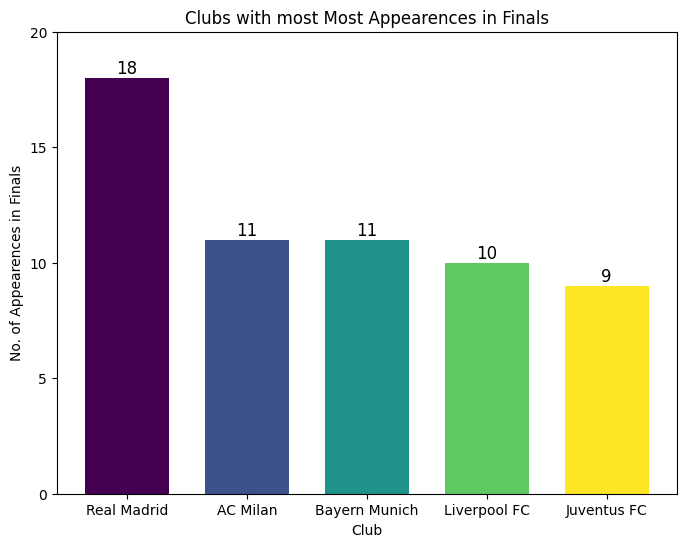

In [15]:
fig = plt.figure(figsize = (8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Choosing the 'viridis' colormap for 5 bars
appearances = df["Winning_team"].value_counts().add(df["Losing_team"].value_counts(), fill_value=0).astype(int).sort_values(ascending=False)

# creating the bar plot
plt.bar(appearances.index[:5], appearances.values[:5], width=0.7, color=colors)

plt.xlabel("Club")
plt.ylabel("No. of Appearences in Finals")
plt.title("Clubs with most Most Appearences in Finals")
for i, value in enumerate(appearances.values[:5]):
    plt.text(i, value + 0.01,  
             str(value),      
             ha='center',    
             va='bottom',     
             fontsize=12)     
plt.yticks(np.arange(0, appearances.max() + 5, 5))  

plt.show()

Calculating Win percentage in finals

In [16]:
(df["Winning_team"].value_counts()
.div(df["Winning_team"].value_counts().add(df["Losing_team"].value_counts(), fill_value=0))
.fillna(0)
.sort_values(ascending=False)
.mul(100)
.round(2)
)

FC Porto                    100.00
PSV Eindhoven               100.00
Nottingham Forest           100.00
RV & AV Feijenoord          100.00
Aston Villa                 100.00
Red Star Belgrade           100.00
Real Madrid                  83.33
FC Barcelona                 71.43
Chelsea FC                   66.67
Ajax Amsterdam               66.67
AC Milan                     63.64
Manchester United            60.00
Liverpool FC                 60.00
Bayern Munich                54.55
Inter Milan                  50.00
Olympique Marseille          50.00
Hamburger SV                 50.00
Celtic FC                    50.00
Steaua Bucharest             50.00
Manchester City              50.00
Borussia Dortmund            33.33
SL Benfica                   28.57
Juventus FC                  22.22
Panathinaikos FC              0.00
Paris Saint-Germain           0.00
Stade Reims                   0.00
Tottenham Hotspur             0.00
UC Sampdoria                  0.00
AC Fiorentina       

In [17]:
win_percentage = (df["Winning_team"].value_counts()
                  .div(appearances)
                  .fillna(0)
                  .mul(100)
                  .round(2)
                 )

# Combine win percentage and total finals into a DataFrame
win_stats = pd.DataFrame({
    'Win_Percentage': win_percentage,
    'Finals_Played': appearances
}).sort_values(by='Win_Percentage', ascending=False)

win_stats.head(10)

,Win_Percentage,Finals_Played
FC Porto,100.00,2
PSV Eindhoven,100.00,1
Nottingham Forest,100.00,2
RV & AV Feijenoord,100.00,1
Aston Villa,100.00,1
Red Star Belgrade,100.00,1
Real Madrid,83.33,18
FC Barcelona,71.43,7
Chelsea FC,66.67,3
Ajax Amsterdam,66.67,6


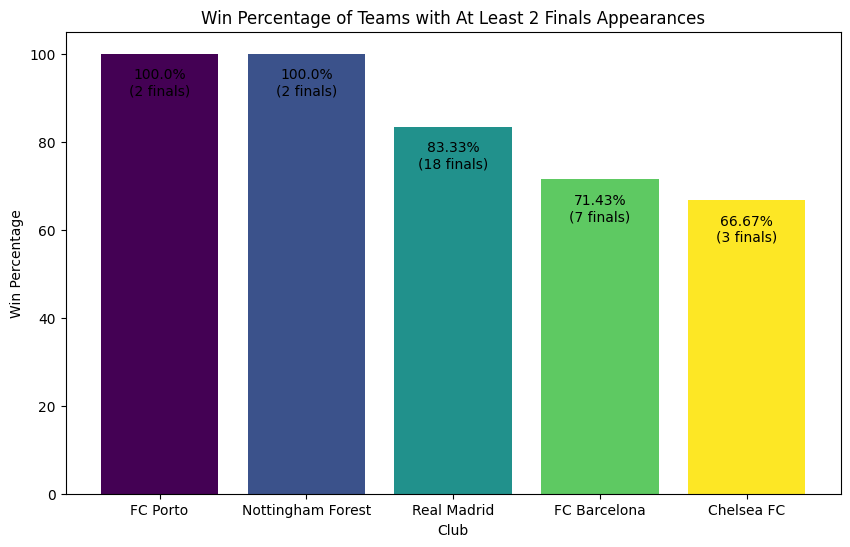

In [18]:
#keeping only clubs with > 2 finals appearences
filtered_win_stats = win_stats[win_stats['Finals_Played'] >= 2].sort_values(by='Win_Percentage', ascending=False).head(5)

fig = plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_win_stats)))

plt.bar(filtered_win_stats.index, filtered_win_stats['Win_Percentage'], color=colors)

plt.xlabel("Club")
plt.ylabel("Win Percentage")
plt.title("Win Percentage of Teams with At Least 2 Finals Appearances")

for i, (value, appearances) in enumerate(zip(filtered_win_stats['Win_Percentage'], filtered_win_stats['Finals_Played'])):
    plt.text(i, value-10,  
             f'{value}%\n({appearances} finals)', 
             ha='center',    
             va='bottom',
             fontsize=10)

plt.yticks(np.arange(0, 110, 20))  

plt.show()

#### Finding out instances where clubs won/lost the finals hosted in their Home country

In [19]:
df.head()

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
0,23/24,Borussia Dortmund,0:2,Real Madrid,Real Madrid,Borussia Dortmund,2,Spain,Germany,England,Wembley Stadium,"Harry Kane, Kylian Mbappé","Bayern Munich, Paris Saint-Germain","England, France",8,"Centre-Forward, Centre-Forward"
1,22/23,Manchester City,1:0,Inter Milan,Manchester City,Inter Milan,1,England,Italy,Turkey,Atatürk Olympic Stadium,Erling Haaland,Manchester City,Norway,12,Centre-Forward
2,21/22,Liverpool FC,0:1,Real Madrid,Real Madrid,Liverpool FC,1,Spain,England,France,Stade de France,Karim Benzema,Real Madrid,France,15,Centre-Forward
3,20/21,Manchester City,0:1,Chelsea FC,Chelsea FC,Manchester City,1,England,England,Portugal,Estádio do Dragão,Erling Haaland,Borussia Dortmund,Norway,10,Centre-Forward
4,19/20,Paris Saint-Germain,0:1,Bayern Munich,Bayern Munich,Paris Saint-Germain,1,Germany,France,Portugal,Estádio da Luz,Robert Lewandowski,Bayern Munich,Poland,15,Centre-Forward


In [20]:
df[df["Winners_country"]==df["Host_Country"]].reset_index(drop=True)

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
0,96/97,Borussia Dortmund,3:1,Juventus FC,Borussia Dortmund,Juventus FC,2,Germany,Italy,Germany,Olympiastadion,Milinko Pantic,Atlético de Madrid,Serbia,5,Attacking Midfield
1,95/96,Juventus FC,5:3 on pens,Ajax Amsterdam,Juventus FC,Ajax Amsterdam,2,Italy,Netherlands,Italy,Stadio Olimpico,Jari Litmanen,Ajax Amsterdam,Finland,9,Attacking Midfield
2,77/78,Liverpool FC,1:0,Club Brugge KV,Liverpool FC,Club Brugge KV,1,England,Belgium,England,Wembley Stadium,Allan Simonsen,Borussia Mönchengladbach,Denmark,5,Second Striker
3,71/72,Ajax Amsterdam,2:0,Inter Milan,Ajax Amsterdam,Inter Milan,2,Netherlands,Italy,Netherlands,De Kuip,Silvester Takac,Standard Liège,Serbia,5,Centre-Forward
4,67/68,Manchester United,4:1 AET,SL Benfica,Manchester United,SL Benfica,3,England,Portugal,England,Wembley Stadium,Eusébio,SL Benfica,Portugal,6,Centre-Forward
5,64/65,Inter Milan,1:0,SL Benfica,Inter Milan,SL Benfica,1,Italy,Portugal,Italy,San Siro,Eusébio,SL Benfica,Portugal,9,Centre-Forward
6,56/57,Real Madrid,2:0,AC Fiorentina,Real Madrid,AC Fiorentina,2,Spain,Italy,Spain,Santiago Bernabéu,Dennis Viollet,Manchester United,England,9,Centre-Forward


There have been **Seven (7)** occasions in UCL History, where clubs have **won the title** while **playing the finals in their Home country**, with the *last win in 1997*.

In [21]:
df[df["Runner_ups_country"]==df["Host_Country"]].reset_index(drop=True)

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
0,11/12,Bayern Munich,4:5 on pens,Chelsea FC,Chelsea FC,Bayern Munich,1,England,Germany,Germany,Allianz Arena,Lionel Messi,FC Barcelona,Argentina,14,Right Winger
1,10/11,FC Barcelona,3:1,Manchester United,FC Barcelona,Manchester United,2,Spain,England,England,Wembley Stadium,Lionel Messi,FC Barcelona,Argentina,12,Right Winger
2,85/86,Steaua Bucharest,2:0 on pens,FC Barcelona,Steaua Bucharest,FC Barcelona,2,Romania,Spain,Spain,Ramón Sánchez Pizjuán,Torbjörn Nilsson,IFK Göteborg,Sweden,6,Centre-Forward
3,83/84,Liverpool FC,5:3 on pens,AS Roma,Liverpool FC,AS Roma,2,England,Italy,Italy,Stadio Olimpico,Viktor Sokol,Dinamo Minsk,Belarus,6,Centre-Forward
4,55/56,Real Madrid,4:3,Stade Reims,Real Madrid,Stade Reims,1,Spain,France,France,Parc des Princes,Milos Milutinovic,FK Partizan Belgrade,Serbia,8,Centre-Forward


On the other hand, there have been **5 times** where clubs **lost the finals** hosted **in their home country**.

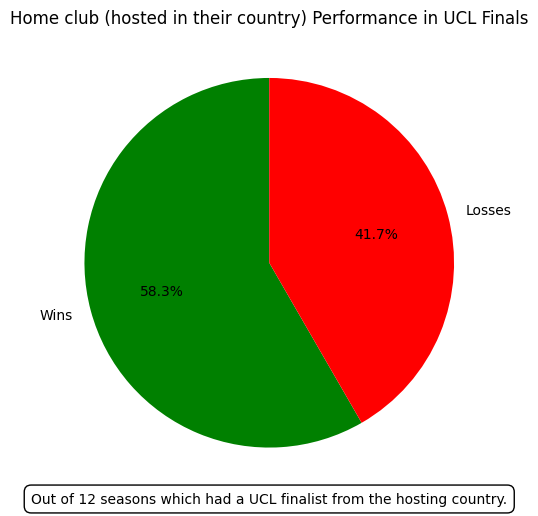

In [22]:
home_teamcountry_wins = df[df["Winners_country"] == df["Host_Country"]].reset_index(drop=True)

home_teamcountry_losses = df[df["Runner_ups_country"] == df["Host_Country"]].reset_index(drop=True)

win_count = len(home_teamcountry_wins)
loss_count = len(home_teamcountry_losses)

plt.figure(figsize=(6, 6))
plt.pie([win_count, loss_count], labels=['Wins', 'Losses'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)

plt.text(0, -1.3, 'Out of 12 seasons which had a UCL finalist from the hosting country.',
         horizontalalignment='center', fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
plt.title('Home club (hosted in their country) Performance in UCL Finals')
plt.show()


####  Exploring *finals* that went to **Penalties/Extra time**

In [23]:
(df[df["FT_score"]
.str.contains('pens')]
.reset_index(drop=True))

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
0,15/16,Real Madrid,6:4 on pens,Atlético de Madrid,Real Madrid,Atlético de Madrid,2,Spain,Spain,Italy,San Siro,Cristiano Ronaldo,Real Madrid,Portugal,16,Centre-Forward
1,11/12,Bayern Munich,4:5 on pens,Chelsea FC,Chelsea FC,Bayern Munich,1,England,Germany,Germany,Allianz Arena,Lionel Messi,FC Barcelona,Argentina,14,Right Winger
2,07/08,Manchester United,6:5 on pens,Chelsea FC,Manchester United,Chelsea FC,1,England,England,Russia,Luzhniki Stadium,Cristiano Ronaldo,Manchester United,Portugal,8,Centre-Forward
3,04/05,AC Milan,5:6 on pens,Liverpool FC,Liverpool FC,AC Milan,1,England,Italy,Turkey,Atatürk Olympic Stadium,Ruud van Nistelrooy,Manchester United,Netherlands,8,Centre-Forward
4,02/03,Juventus FC,2:3 on pens,AC Milan,AC Milan,Juventus FC,1,Italy,Italy,England,Old Trafford,Ruud van Nistelrooy,Manchester United,Netherlands,12,Centre-Forward
5,00/01,Bayern Munich,5:4 on pens,Valencia CF,Bayern Munich,Valencia CF,1,Germany,Spain,Italy,San Siro,Andriy Shevchenko,AC Milan,Ukraine,9,Centre-Forward
6,95/96,Juventus FC,5:3 on pens,Ajax Amsterdam,Juventus FC,Ajax Amsterdam,2,Italy,Netherlands,Italy,Stadio Olimpico,Jari Litmanen,Ajax Amsterdam,Finland,9,Attacking Midfield
7,90/91,Red Star Belgrade,5:3 on pens,Olympique Marseille,Red Star Belgrade,Olympique Marseille,2,Yugoslavia,France,Italy,Stadio San Nicola,"Peter Pacult, Jean-Pierre Papin, Darko Pancev","FC Swarovski Tirol, Olympique Marseille, Red S...","Austria, France, North Macedonia",6,"Sturm, Centre-Forward, Centre-Forward"
8,87/88,PSV Eindhoven,6:5 on pens,SL Benfica,PSV Eindhoven,SL Benfica,1,Netherlands,Portugal,Germany,Neckarstadion,"Míchel, Jean-Marc Ferreri","Real Madrid, FC Girondins Bordeaux","Spain, France",4,"Right Midfield, Attacking Midfield"
9,85/86,Steaua Bucharest,2:0 on pens,FC Barcelona,Steaua Bucharest,FC Barcelona,2,Romania,Spain,Spain,Ramón Sánchez Pizjuán,Torbjörn Nilsson,IFK Göteborg,Sweden,6,Centre-Forward


A total of **11 UCL Finals** went to **penalties**

In [24]:
(df
[df["FT_score"].str.contains('pens')]
.reset_index(drop=True)
["Winning_team"].value_counts())
## teams and no. of times they won ucl on penalties

Liverpool FC         2
Real Madrid          1
Chelsea FC           1
Manchester United    1
AC Milan             1
Bayern Munich        1
Juventus FC          1
Red Star Belgrade    1
PSV Eindhoven        1
Steaua Bucharest     1
Name: Winning_team, dtype: int64

In [25]:
(df
[df["FT_score"].str.contains('pens')]
.reset_index(drop=True)
["Losing_team"].value_counts())
#clubs that lost on penalties

Atlético de Madrid     1
Bayern Munich          1
Chelsea FC             1
AC Milan               1
Juventus FC            1
Valencia CF            1
Ajax Amsterdam         1
Olympique Marseille    1
SL Benfica             1
FC Barcelona           1
AS Roma                1
Name: Losing_team, dtype: int64

In [26]:
(df
[df["FT_score"]
.str.contains('AET')]
.reset_index(drop=True))

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
0,13/14,Real Madrid,4:1 AET,Atlético de Madrid,Real Madrid,Atlético de Madrid,3,Spain,Spain,Portugal,Estádio da Luz,Cristiano Ronaldo,Real Madrid,Portugal,17,Centre-Forward
1,91/92,FC Barcelona,1:0 AET,UC Sampdoria,FC Barcelona,UC Sampdoria,1,Spain,Italy,England,Wembley Stadium,Jean-Pierre Papin,Olympique Marseille,France,7,Centre-Forward
2,69/70,RV & AV Feijenoord,2:1 AET,Celtic FC,RV & AV Feijenoord,Celtic FC,1,Netherlands,Scotland,Italy,San Siro,Ove Kindvall,Feyenoord Rotterdam,Sweden,7,Centre-Forward
3,67/68,Manchester United,4:1 AET,SL Benfica,Manchester United,SL Benfica,3,England,Portugal,England,Wembley Stadium,Eusébio,SL Benfica,Portugal,6,Centre-Forward
4,57/58,Real Madrid,3:2 AET,AC Milan,Real Madrid,AC Milan,1,Spain,Italy,Belgium,Heysel Stadium,Alfredo di Stéfano,Real Madrid,Spain,10,Second Striker


In only **5 seasons**, the finals were decided in **Extra time**

In [27]:
(df
[df["FT_score"]
.str.contains('AET')]
.reset_index(drop=True)
["Winning_team"].value_counts())
#teams that won in extra time

Real Madrid           2
FC Barcelona          1
RV & AV Feijenoord    1
Manchester United     1
Name: Winning_team, dtype: int64

<Figure size 800x600 with 0 Axes>

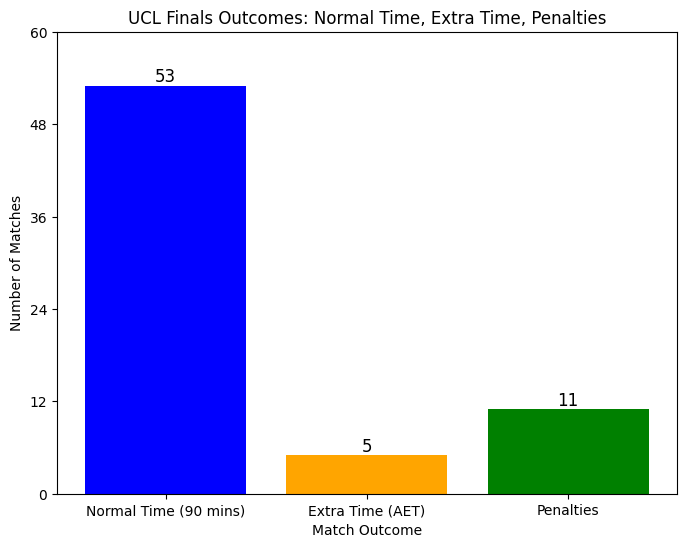

In [28]:
fig = plt.figure(figsize = (8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  

extra_time_count=len(df[df["FT_score"].str.contains('AET')].reset_index(drop=True))
penalties_count=len(df[df["FT_score"].str.contains('pens')].reset_index(drop=True))
normal_90_count=len(df)-(extra_time_count+penalties_count)
categories = ['Normal Time (90 mins)', 'Extra Time (AET)', 'Penalties']
values = [normal_90_count, extra_time_count, penalties_count]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'orange', 'green'])

plt.title('UCL Finals Outcomes: Normal Time, Extra Time, Penalties')
plt.ylabel('Number of Matches')
plt.xlabel('Match Outcome')
for i, value in enumerate(values):
    plt.text(i, value + 0.01,  
             str(value),      
             ha='center',    
             va='bottom',     
             fontsize=12)     
plt.yticks(np.arange(0, 70, 12))  

plt.show()

#### Home team vs away team performance in ucl finals
NOTE: For administrative purposes, there is always a "home" team at a final -- even if it is held at a neutral venue.
It helps with scenarios such as kit clashes by dictating that the "away" side should wear their alternative strip.

In [29]:
(len(df
     [df["Home_team"]==df["Winning_team"]]
     .reset_index(drop=True)))

54

In [30]:
(len(df)
-len(df[df["Home_team"]==df["Winning_team"]]
.reset_index(drop=True)))

15

**Away team** in the final won only **15** times

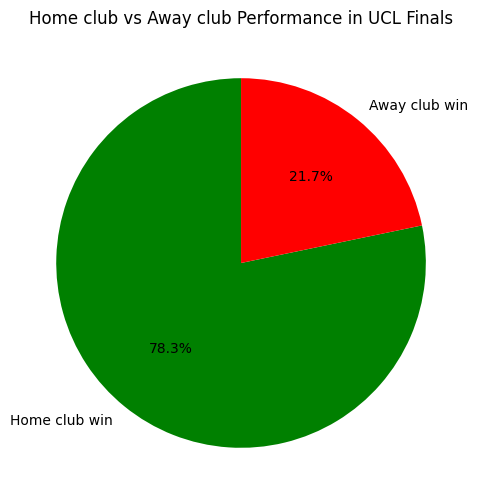

In [31]:
home_team_wins = df[df["Home_team"] == df["Winning_team"]].reset_index(drop=True)

away_team_wins = df[df["Away_team"] == df["Winning_team"]].reset_index(drop=True)

home_count = len(home_team_wins)
away_count = len(away_team_wins)

plt.figure(figsize=(6, 6))
plt.pie([home_count, away_count], labels=['Home club win', 'Away club win'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)


plt.title('Home club vs Away club Performance in UCL Finals')
plt.show()

#### Analyzing performance of Countries(w.r.t. clubs) in UCL finals

In [32]:
df["Winners_country"].value_counts()

Spain          20
England        15
Italy          12
Germany         8
Netherlands     6
Portugal        4
France          1
Yugoslavia      1
Romania         1
Scotland        1
Name: Winners_country, dtype: int64

In [34]:
df["Runner_ups_country"].value_counts()

Italy          17
Germany        11
England        11
Spain          11
France          6
Portugal        5
Netherlands     2
Romania         1
Sweden          1
Belgium         1
Greece          1
Scotland        1
Yugoslavia      1
Name: Runner_ups_country, dtype: int64

In [36]:
(df["Winners_country"].value_counts()
 .add(df["Runner_ups_country"].value_counts(), fill_value=0)
 .astype(int)
 .sort_values(ascending=False))

Spain          31
Italy          29
England        26
Germany        19
Portugal        9
Netherlands     8
France          7
Romania         2
Scotland        2
Yugoslavia      2
Belgium         1
Greece          1
Sweden          1
dtype: int32

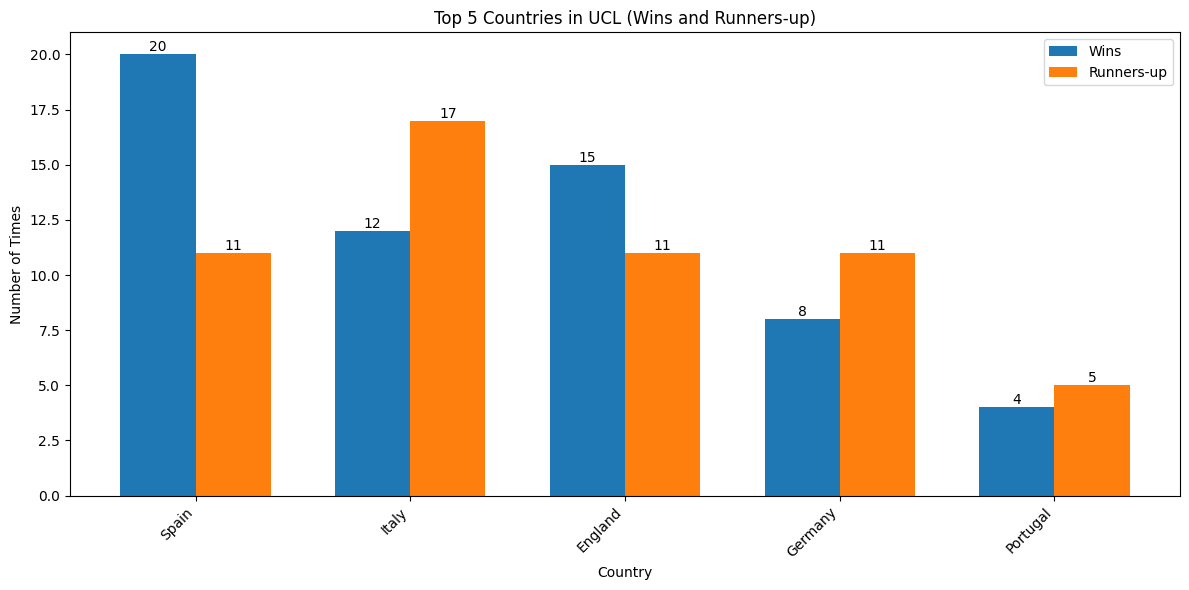

In [37]:
winners = df["Winners_country"].value_counts()
runners_up = df["Runner_ups_country"].value_counts()

countries = pd.concat([winners, runners_up], axis=1).fillna(0)
countries.columns = ['Wins', 'Runners-up']
countries['Total'] = countries['Wins'] + countries['Runners-up']
countries = countries.sort_values('Total', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.35
x = np.arange(len(countries.index))

ax.bar(x - width/2, countries['Wins'], width, label='Wins', color='#1f77b4')
ax.bar(x + width/2, countries['Runners-up'], width, label='Runners-up', color='#ff7f0e')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Times')
ax.set_title('Top 5 Countries in UCL (Wins and Runners-up)')
ax.set_xticks(x)
ax.set_xticklabels(countries.index, rotation=45, ha='right')
ax.legend()

for i, (wins, runners_up) in enumerate(zip(countries['Wins'], countries['Runners-up'])):
    ax.text(i - width/2, wins, f'{wins:.0f}', ha='center', va='bottom')
    ax.text(i + width/2, runners_up, f'{runners_up:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [38]:
(df["Winners_country"].value_counts()
               .div(df["Winners_country"].value_counts()
               .add(df["Runner_ups_country"].value_counts(), fill_value=0))
               .fillna(0)
               .sort_values(ascending=False)
               .mul(100)
               .round(2)
              )
#calculating win % in finals(wrt clubs from a country)

Netherlands    75.00
Spain          64.52
England        57.69
Romania        50.00
Scotland       50.00
Yugoslavia     50.00
Portugal       44.44
Germany        42.11
Italy          41.38
France         14.29
Belgium         0.00
Greece          0.00
Sweden          0.00
dtype: float64

In [39]:
appearances_country = df["Winners_country"].value_counts().add(df["Runner_ups_country"].value_counts(), fill_value=0).astype(int).sort_values(ascending=False)

win_percentage_country = (df["Winners_country"].value_counts()
                  .div(appearances_country)
                  .fillna(0)
                  .mul(100)
                  .round(2)
                 )

win_stats_country = pd.DataFrame({
    'Win_Percentage': win_percentage_country,
    'Finals_Played': appearances_country
}).sort_values(by='Win_Percentage', ascending=False)

win_stats_country.head(10)

,Win_Percentage,Finals_Played
Netherlands,75.00,8
Spain,64.52,31
England,57.69,26
Romania,50.00,2
Scotland,50.00,2
Yugoslavia,50.00,2
Portugal,44.44,9
Germany,42.11,19
Italy,41.38,29
France,14.29,7


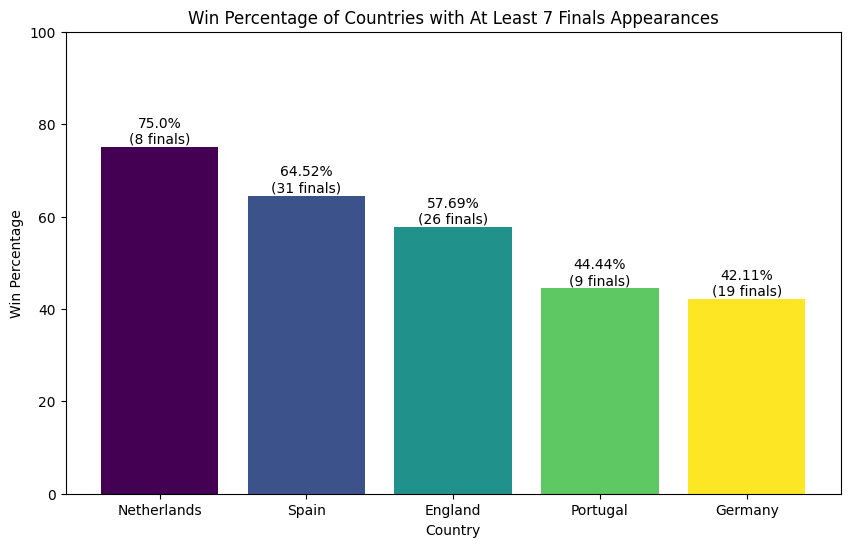

In [40]:
#keeping only countries with > 7 finals appearences
filtered_win_stats_country = win_stats_country[win_stats_country['Finals_Played'] >= 7].sort_values(by='Win_Percentage', ascending=False).head(5)

fig = plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_win_stats_country)))

plt.bar(filtered_win_stats_country.index, filtered_win_stats_country['Win_Percentage'], color=colors)

plt.xlabel("Country")
plt.ylabel("Win Percentage")
plt.title("Win Percentage of Countries with At Least 7 Finals Appearances")

for i, (value, appearances_country) in enumerate(zip(filtered_win_stats_country['Win_Percentage'], filtered_win_stats_country['Finals_Played'])):
    plt.text(i, value+0.2,  
             f'{value}%\n({appearances_country} finals)', 
             ha='center',    
             va='bottom',
             fontsize=10)

plt.yticks(np.arange(0, 110, 20))  

plt.show()

#### Key Findings:
- **Spanish** clubs have won with **most ucl titles(20)** combined whilst **Italian clubs** have **lost** the UCL Final the most times(**17**).
- Most appearences in UCL finals:
    1. Spain (31)
    2. Italy (29)
    3. England(26)
- Highest Win percentage:
    1. Netherlands     75.00 %
    2. Spain           64.52 %
    3. England         57.69 %

### Analyzing top scorer's attributes
- Most finishes as UCL Top scorer
- Seasons where Top scorer has won the UCL vs did not win the ucl
- Seasons where Top scorers won the UCL Final in his home country
- Top scorers by club
- Top scorers by nationality
- Average goals by top scorers over decades

In [41]:
df.sample(3)

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
33,90/91,Red Star Belgrade,5:3 on pens,Olympique Marseille,Red Star Belgrade,Olympique Marseille,2,Yugoslavia,France,Italy,Stadio San Nicola,"Peter Pacult, Jean-Pierre Papin, Darko Pancev","FC Swarovski Tirol, Olympique Marseille, Red S...","Austria, France, North Macedonia",6,"Sturm, Centre-Forward, Centre-Forward"
42,81/82,Aston Villa,1:0,Bayern Munich,Aston Villa,Bayern Munich,1,England,Germany,Netherlands,De Kuip,Dieter Hoeneß,Bayern Munich,Germany,7,Centre-Forward
5,18/19,Tottenham Hotspur,0:2,Liverpool FC,Liverpool FC,Tottenham Hotspur,2,England,England,Spain,Metropolitano Stadium,Lionel Messi,FC Barcelona,Argentina,12,Right Winger


In [42]:
(df["Top_scorer"]
.str.split(', ')
.explode() #  Expands lists of players into separate rows.
.value_counts()
)
#players and no. of times they finished as highest goalscorer of a season

Cristiano Ronaldo        7
Lionel Messi             6
Gerd Müller              4
Ruud van Nistelrooy      3
Andriy Shevchenko        3
Jean-Pierre Papin        3
Eusébio                  3
Ferenc Puskás            3
Romário                  2
Alfredo di Stéfano       2
Torbjörn Nilsson         2
Erling Haaland           2
Antonis Antoniadis       1
Allan Simonsen           1
Claudio Sulser           1
Jupp Heynckes            1
Eduard Markarov          1
Silvester Takac          1
Sören Lerby              1
Harry Kane               1
Paul Van Himst           1
Ove Kindvall             1
Denis Law                1
Graeme Souness           1
Flórián Albert           1
Sandro Mazzola           1
Vladimir Kovacevic       1
José Altafini            1
José Águas               1
Just Fontaine            1
Dennis Viollet           1
Karl-Heinz Rummenigge    1
Borislav Cvetkovic       1
Dieter Hoeneß            1
Michel Platini           1
Karim Benzema            1
Robert Lewandowski       1
N

In [43]:
(df.assign
 (Top_scorer_club=df['Top_scorer_club']
  .apply(lambda x: x.split(', ') if isinstance(x, str) else x)) 
  .explode('Top_scorer_club') 
  .query("Winning_team == Top_scorer_club")
  .reset_index(drop=True)
  )[["Season","Winning_team","Top_scorer","Top_scorer_goals"]]
#seasons where top scorer has won the UCL

,Season,Winning_team,Top_scorer,Top_scorer_goals
0,22/23,Manchester City,Erling Haaland,12
1,21/22,Real Madrid,Karim Benzema,15
2,19/20,Bayern Munich,Robert Lewandowski,15
3,17/18,Real Madrid,Cristiano Ronaldo,15
4,16/17,Real Madrid,Cristiano Ronaldo,12
5,15/16,Real Madrid,Cristiano Ronaldo,16
6,14/15,FC Barcelona,"Cristiano Ronaldo, Lionel Messi, Neymar",10
7,14/15,FC Barcelona,"Cristiano Ronaldo, Lionel Messi, Neymar",10
8,13/14,Real Madrid,Cristiano Ronaldo,17
9,10/11,FC Barcelona,Lionel Messi,12


In **25/69** seasons (roughly one-third), the **top scorer** has gone on to **win** the **UCL**.

In [44]:
(df.assign
 (Top_scorer_club=df['Top_scorer_club']
  .apply(lambda x: x.split(', ') if isinstance(x, str) else x)) 
  .explode('Top_scorer_club') 
  .query("Losing_team == Top_scorer_club")
  .reset_index(drop=True)
  )[["Season","Losing_team","Top_scorer","Top_scorer_goals"]]
#seasons where top scorer has lost the UCL final

,Season,Losing_team,Top_scorer,Top_scorer_goals
0,03/04,AS Monaco,Fernando Morientes,9
1,97/98,Juventus FC,Alessandro Del Piero,10
2,95/96,Ajax Amsterdam,Jari Litmanen,9
3,93/94,FC Barcelona,Ronald Koeman,8
4,90/91,Olympique Marseille,"Peter Pacult, Jean-Pierre Papin, Darko Pancev",6
5,82/83,Juventus FC,Michel Platini,5
6,81/82,Bayern Munich,Dieter Hoeneß,7
7,70/71,Panathinaikos FC,Antonis Antoniadis,10
8,67/68,SL Benfica,Eusébio,6
9,64/65,SL Benfica,Eusébio,9


Contrarily, there have been **14 seasons** where the **top scorer** finished as the **runner up**.

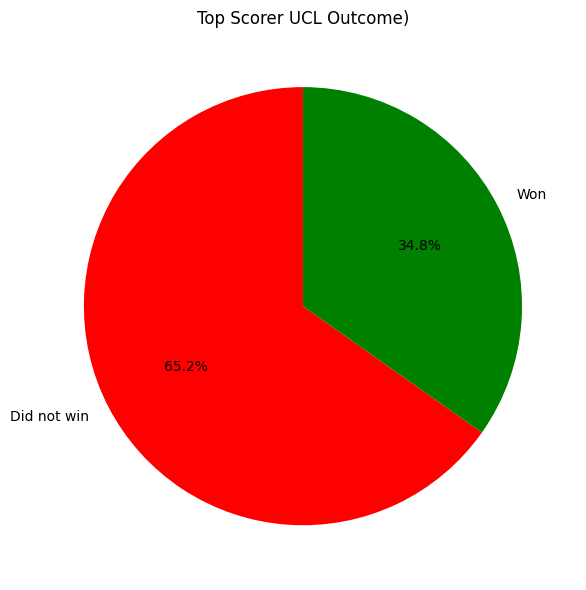

In [126]:
df['Top_scorer_club_list'] = df['Top_scorer_club'].apply(lambda x: x.split(', ') if isinstance(x, str) else [x])

df['Top_scorer_won_UCL'] = df.apply(lambda row: any(club in row['Winning_team'] for club in row['Top_scorer_club_list']), axis=1)

top_scorer_wins_losses = df['Top_scorer_won_UCL'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(top_scorer_wins_losses, labels=['Did not win', 'Won'], autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Top Scorer UCL Outcome)')
plt.tight_layout()
plt.show()

In [46]:
(df.assign
 (Top_scorer_club=df['Top_scorer_country']
  .apply(lambda x: x.split(', ') if isinstance(x, str) else x)) 
  .explode('Top_scorer_country') 
  .query("Host_Country == Top_scorer_country")
  .reset_index(drop=True)
  )[["Season","Host_Country","Top_scorer","Top_scorer_goals"]]


,Season,Host_Country,Top_scorer,Top_scorer_goals
0,21/22,France,Karim Benzema,15
1,13/14,Portugal,Cristiano Ronaldo,17


Only **2/69 seasons** have seen the **Top scorer** *lift the UCL Trophy* in his **home country**

In [47]:
(df["Top_scorer_position"]
.str.split(', ')
.explode() 
.value_counts()
)
#analyzing top scorer's position 

Centre-Forward        59
Second Striker         7
Right Winger           6
Attacking Midfield     6
Left Winger            2
Central Midfield       2
Sweeper                1
Sturm                  1
Right Midfield         1
Name: Top_scorer_position, dtype: int64

In [48]:
df["Top_scorer_goals"].describe()

count    69.000000
mean      9.043478
std       2.947755
min       4.000000
25%       7.000000
50%       9.000000
75%      10.000000
max      17.000000
Name: Top_scorer_goals, dtype: float64

In [50]:
df.head(2)

,Season,Home_team,FT_score,Away_team,Winning_team,Losing_team,GD,Winners_country,Runner_ups_country,Host_Country,Finals_stadium,Top_scorer,Top_scorer_club,Top_scorer_country,Top_scorer_goals,Top_scorer_position
0,23/24,Borussia Dortmund,0:2,Real Madrid,Real Madrid,Borussia Dortmund,2,Spain,Germany,England,Wembley Stadium,"Harry Kane, Kylian Mbappé","Bayern Munich, Paris Saint-Germain","England, France",8,"Centre-Forward, Centre-Forward"
1,22/23,Manchester City,1:0,Inter Milan,Manchester City,Inter Milan,1,England,Italy,Turkey,Atatürk Olympic Stadium,Erling Haaland,Manchester City,Norway,12,Centre-Forward


In [71]:
top_scorer_by_country=df['Top_scorer_country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()

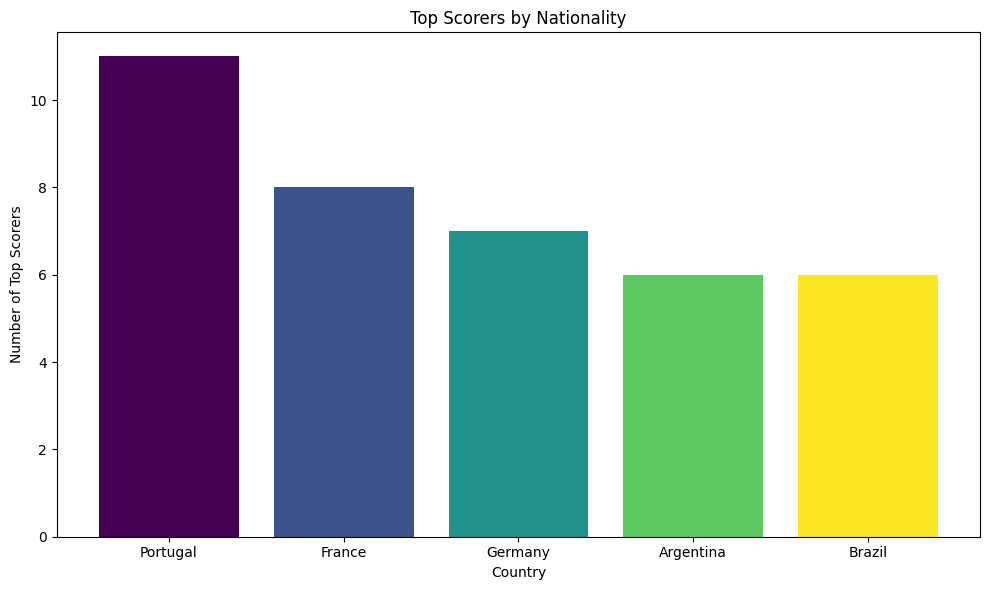

In [75]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1,5))
plt.bar(top_scorer_by_country[:5].index,top_scorer_by_country[:5].values,color=colors)
plt.xlabel('Country')
plt.ylabel('Number of Top Scorers')
plt.title('Top Scorers by Nationality')
plt.tight_layout()
plt.show()

In [73]:
top_scorer_by_club=df['Top_scorer_club'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()

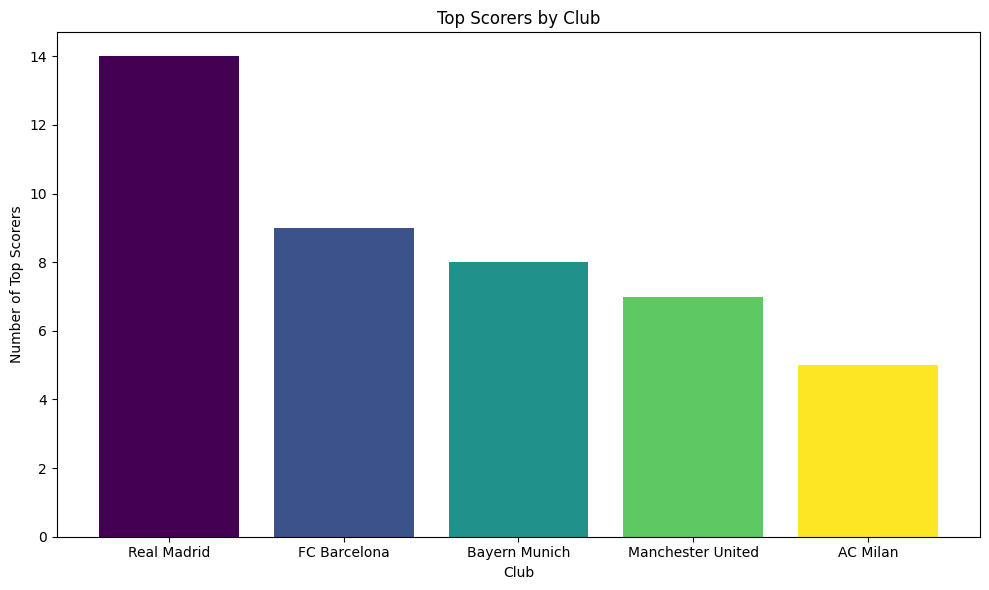

In [76]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1,5))
plt.bar(top_scorer_by_club[:5].index,top_scorer_by_club[:5].values,color=colors)
plt.xlabel('Club')
plt.ylabel('Number of Top Scorers')
plt.title('Top Scorers by Club')
plt.tight_layout()
plt.show()

In [82]:
def convert_season(season):
    start_year = int(season.split('/')[0])
    if start_year > 50:  # Assuming years like '55' should map to 1955, '99' to 1999
        start_year += 1900
    else:
        start_year += 2000
    return start_year
df['Start_Year'] = df['Season'].apply(convert_season)


In [116]:
# Step 2: Create bins for every 10 seasons starting from 1955/56
bins = list(range(1955, df['Start_Year'].max() + 10, 10))  # Create bin edges
labels = [f'{b}-{b+10}' for b in bins[:-1]]  # Create labels for the bins

# Step 3: Assign each season to a bin
df['Season_Bin'] = pd.cut(df['Start_Year'], bins=bins, labels=labels, right=False)

# Step 4: Calculate the average goals by top scorer for each bin
average_goals_by_bin = df.groupby('Season_Bin')['Top_scorer_goals'].mean()


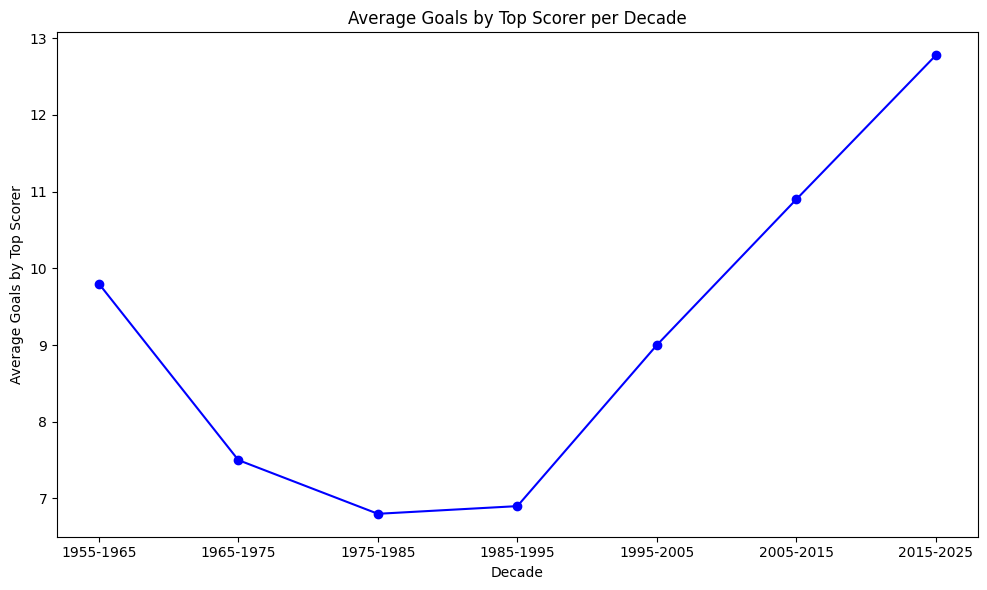

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(average_goals_by_bin.index, average_goals_by_bin.values, marker='o', linestyle='-', color='b')
plt.xlabel('Decade')
plt.ylabel('Average Goals by Top Scorer')
plt.title('Average Goals by Top Scorer per Decade')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()